##Big Data Analytics
##Cameron Carter
##2005572
##Real Estate Valuation Dataset


The chosen dataset is the real estate valuation dataset provided by UCI machine learning repository.

Obtained: 16:00 24/11/2023

This dataset was chosen as it is a historical dataset of real estate valuation collected from the Sindian Dist., New Taipei City, Taiwan and it was chosen because there is a growing concern in rising house prices and through analyzing historical costs in 2012 to 2013 in Taiwan this could help predict future prices. This dataset is also very effective because of its many rows and columns of data that would result in accurate results.

The dataset consists of what factors may cause real estate to increase in cost. The factors this dataset takes into consideration are the date of transaction in which the property was purchased, the age of the property, the distance from the property to the nearest Mass Rapid Transit (MRT) station, the distance from the property to the nearest convenience store, the latitude of the property’s location, the longitude of the property’s location and finally a column stating the price of these properties.

The aim is to build a predictive model to investigate if any factors lead to an increase or decrease in property price of homes in Taiwan. Predictions can be made on property price in the future through the Random Forest model. The Random Forest model is chosen because it is robust to noisy data and handles large datasets well.

The chosen peer review paper is about the real-time value of a home in Mumbai, India. The problem this paper is trying to solve is how to predict the price of a home, while taking into account factors such as area, number of bedrooms and price per square foot so it can help customers find affordable options of properties to buy based on their chosen requirements. The method used in the peer-review paper is a linear regression model which is used to predict the prices of homes based on numerous factors. The reported results were very easily digestible because of their clear presentation through heatmaps and scatter plots. This paper was chosen as it related to my dataset very well.


Manual checks and software scans were done to the dataset for missing values and noise, and within google colab data.info() was executed which showed that every column had 414 rows of data and df.isnull().sum() was executed which confirmed this. There is no need to generate new features as there is no missing data.

Random forest was chosen as it can handle large datasets with numerous features while still being readable. It is also effective at mitigating the influence of outliers on the overall data which leads to consistent output of results.

Through trying linear regression I found that random forest and linear regression lead to a similair conclusion in results.



In [ ]:
#import required variables
import numpy as np
import pandas as pd
import seaborn as sns

#sklearn for ML models
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [ ]:
#check dataset is fully imported
df_schema = pd.read_excel('Real estate valuation data set.xlsx')
#view full dataset
#df_schema

In [ ]:
#import dataset
df = pd.read_excel('Real estate valuation data set.xlsx')
#df.shape
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
 #check number of columns and rows
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 414 rows and 8 columns


Column two, labelled X1 represents the transaction date with March 2013 being labelled as 2013.250 and June 2013 as 2013.500 etc.

Column three labelled X2 represents the age of the house in unit: years.

Column four labelled X3 represents the distance to the nearest Mass Rapid Transit station in unit: meters.

Column five labelled X4 represents the number of convenience stores in the living circle on foot.

Column six labelled X5 represents the geographic coordinate latitude in unit: degrees.

Column seven labelled X6 representsthe geographic coordinate longitude in unit: degrees.

Column eight labelled Y represents the house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

In [ ]:
#check for the data types this also shows there are NO missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
df['Y house price of unit area'].value_counts()



42.5    4
40.3    4
29.3    4
40.6    4
37.4    4
       ..
55.9    1
22.9    1
21.5    1
55.1    1
63.9    1
Name: Y house price of unit area, Length: 270, dtype: int64

Having house price of unit area as the Y value on the graphs we can see if the price is larger or smaller in certain areas when comapred to certain factors.

In the second graph it is clearly shown that when a proeprty is closer to an MRT station the value of the property tends to be higher.

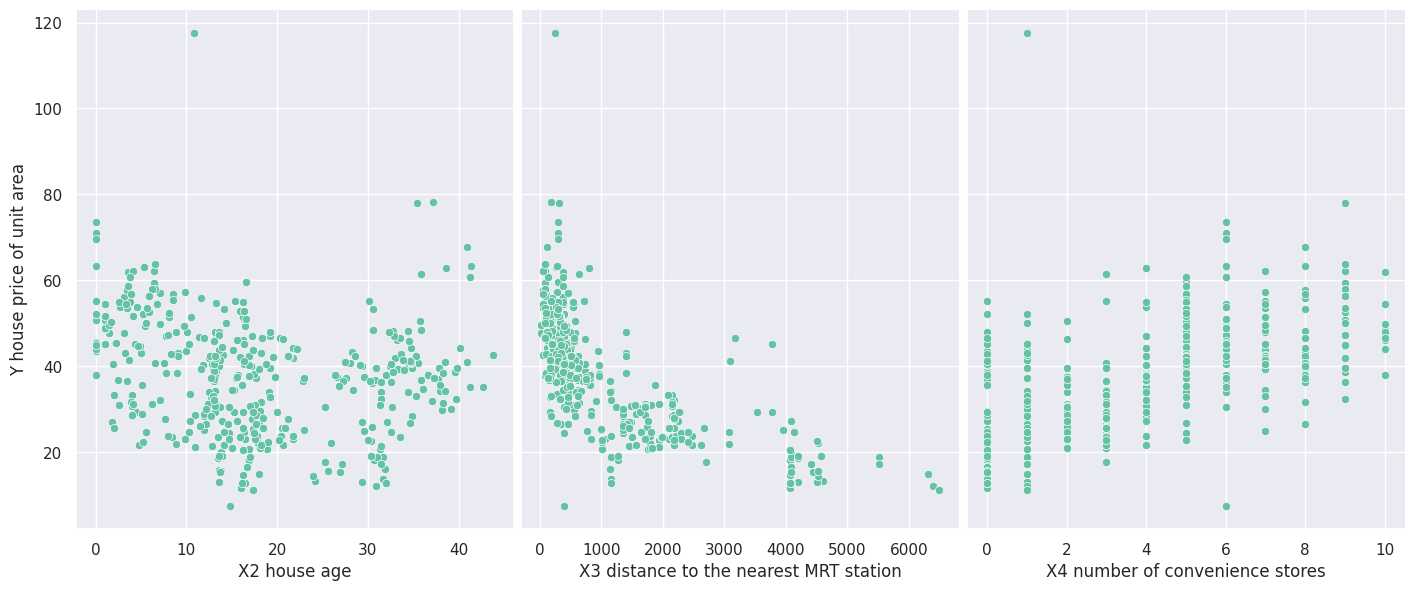

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
sns.pairplot(df, x_vars=['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores'], y_vars='Y house price of unit area', height=6, aspect=0.8)


In [ ]:
#sns.set_style('darkgrid')
#sns.set_palette('Set2')

#MRT = ['X3 distance to the nearest MRT station']
#X = df[MRT]

#Price = ['Y house price of unit area']
#y = df[Price]

# first we make a copy of the dataset to decode the variables (for visualisation purposes)
#dfC = df.copy()
# simple function to change sex values
#def changeS(MRT):
  #if MRT< 1500:
    #return 'close'
  #else:
    #return 'far'
# apply the above function to the whole column in the dataset
#dfC['MRT'] = dfC['MRT'].apply(changeS)
# function to change taget
#def changeT(Price):
  #if Price > 25:
    #return 'expensive'
  #else:
    #return 'cheap'
#dfC['Price'] = dfC['Price'].apply(changeT)

In [ ]:
#check for missing values
df.isnull().sum()


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
#Split the data into train and test
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
print("Train set size:",len(train_data))
print("Test set size:",len(test_data))

Train set size: 301
Test set size: 83


In [ ]:
train_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
159,160,2012.666667,15.5,815.93140,4,24.97886,121.53464,37.4
95,96,2012.916667,8.0,104.81010,5,24.96674,121.54067,51.8
11,12,2013.333333,6.3,90.45606,9,24.97433,121.54310,58.1
374,375,2013.250000,5.4,390.56840,5,24.97937,121.54245,49.5
165,166,2012.916667,13.7,1236.56400,1,24.97694,121.55391,30.6


In [ ]:

train_data.describe()

fig, ax = plt.subplots(2, 3, figsize=(20, 9))
ax = ax.flatten()

sns.set()
sns.lineplot(data=train_data, x="X1 transaction date", y="Y house price of unit area", ax=ax[0])
ax[0].set_title("Price of Unit Area vs. Transaction Date")

sns.lineplot(data=train_data, x="X2 house age", y="Y house price of unit area", ax=ax[1])
ax[1].set_title("Price of Unit Area vs. House Age")

sns.lineplot(data=train_data, x="X3 distance to the nearest MRT station", y="Y house price of unit area", ax=ax[2])
ax[2].set_title("Price of Unit Area vs. Distance to the nearest MRT station")

sns.lineplot(data=train_data, x="X4 number of convenience stores", y="Y house price of unit area", ax=ax[3])
ax[3].set_title("Price of Unit Area vs. no. of Convenience Stores")

sns.lineplot(data=train_data, x="X5 latitude", y="Y house price of unit area", ax=ax[4])
ax[4].set_title("Price of Unit Area vs. Latitude")

sns.lineplot(data=train_data, x="X6 longitude", y="Y house price of unit area", ax=ax[5])
ax[5].set_title("Price of Unit Area vs. Longitude")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show();

It appears that the clsoer an MRT station is then the greater the price of the house.

The price of a house is also proportional to to the number of convenience stores, with the higher number of convenience stores then the greater the price of house.

House age seems to be irrelevant when finding a link between this and the price of the house.  

Latitude and longitude have patterns that must be further explored.


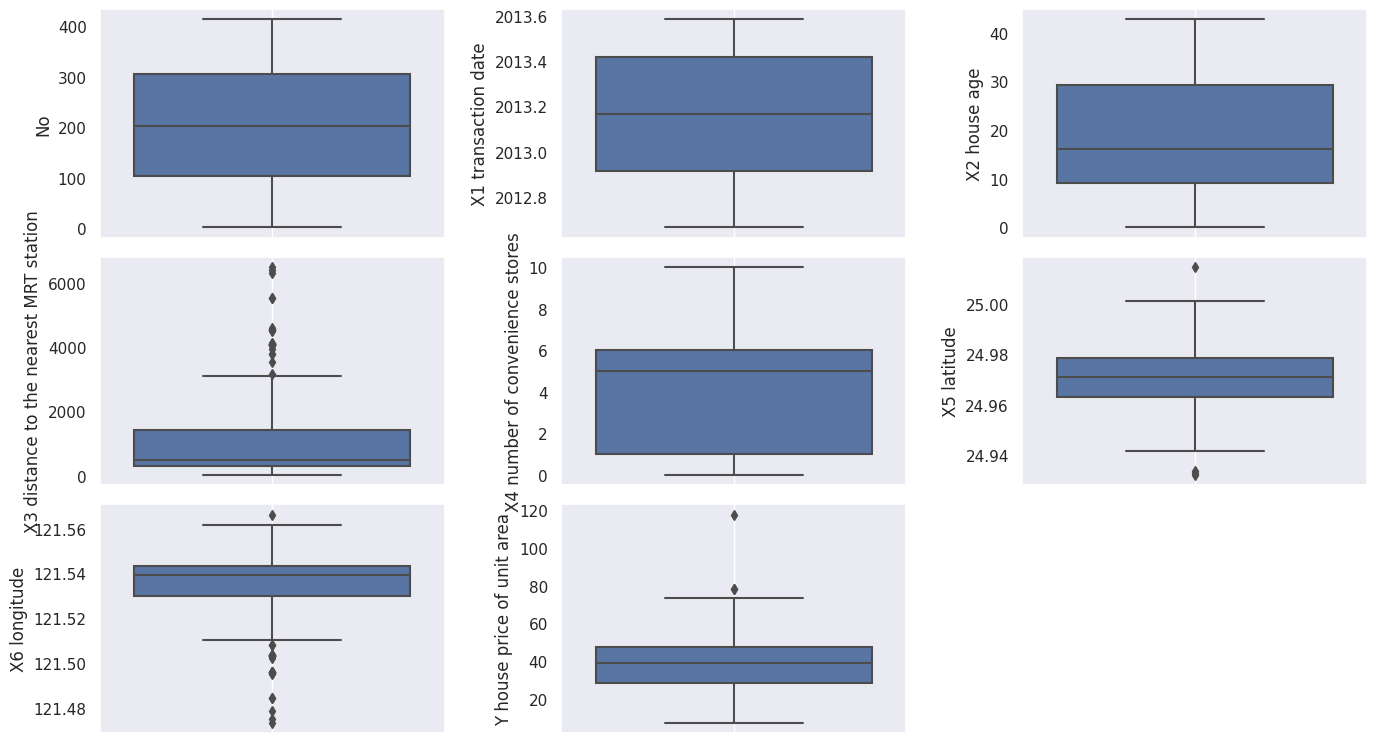

In [ ]:
#check for outliers
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(train_data):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=train_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

The outliers here are Distance to nearest MRT station, longitude and house price of unit area, so these will be dropped

In [ ]:
train_data = train_data[train_data['Y house price of unit area']<80]
train_data = train_data[train_data['X3 distance to the nearest MRT station']<3000]
train_data = train_data[train_data['X6 longitude']>121.50]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

# Convert 'X4 number of convenience stores' column to numeric
df['X4 number of convenience stores'] = pd.to_numeric(df['X4 number of convenience stores'], errors='coerce')

# Convert 'Y house price of unit area' column to numeric
df['Y house price of unit area'] = pd.to_numeric(df['Y house price of unit area'], errors='coerce')

#split into features and targets
X = df[['X4 number of convenience stores']]
y = df['Y house price of unit area']

#initialize model
model2 = RandomForestRegressor(max_depth=2, random_state=0)

#fit model
model2.fit(X, y)

#evaluate model
score = model2.score(X, y)
print('R-squared:', score)

#use model to predict
ypred = model2.predict(X)

#reshape predictions if needed
ypred = ypred.reshape(-1, 1)

#evaluate predictions using metrics
print('MSE : ', mean_squared_error(y, ypred))
print('MAE : ', mean_absolute_error(y, ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y, ypred)))


R-squared: 0.3756734065374949
MSE :  115.30645265412288
MAE :  7.888627650611679
RMSE :  10.738084217127508


In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
ypred=model.predict(X)

In [ ]:
ypred = ypred.reshape(-1,1)

In [ ]:
display(model.score(X, y))

0.32604660851305056